# Домашнее задание 2*. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [8]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        return np.mean((X @ w - y) ** 2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * (X.T @ ( X @ w - y)) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = [w_init] + [None] * n_iterations
    for t in range(n_iterations):
        w[t+1] = w[t] - lr * loss.calc_grad(X, y, w[t])
    
    return w[1:]

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, ax, col, row, label):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)


    ax[row, col].set_title(label)
    ax[row, col].set_xlabel(r'$w_1$')
    ax[row, col].set_ylabel(r'$w_2$')
    ax[row, col].set_xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    ax[row, col].set_ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)


    # visualize the level set
    CS = ax[row, col].contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both', ax=ax[row, col])

    # visualize trajectory
    ax[row, col].scatter(w_list[:, 0], w_list[:, 1])
    ax[row, col].plot(w_list[:, 0], w_list[:, 1])

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

<font color=blue>Рассмотрим 4 варианта шага $\eta\in\{0.1; 0.01; 0.001; 0.0001\}$</font>

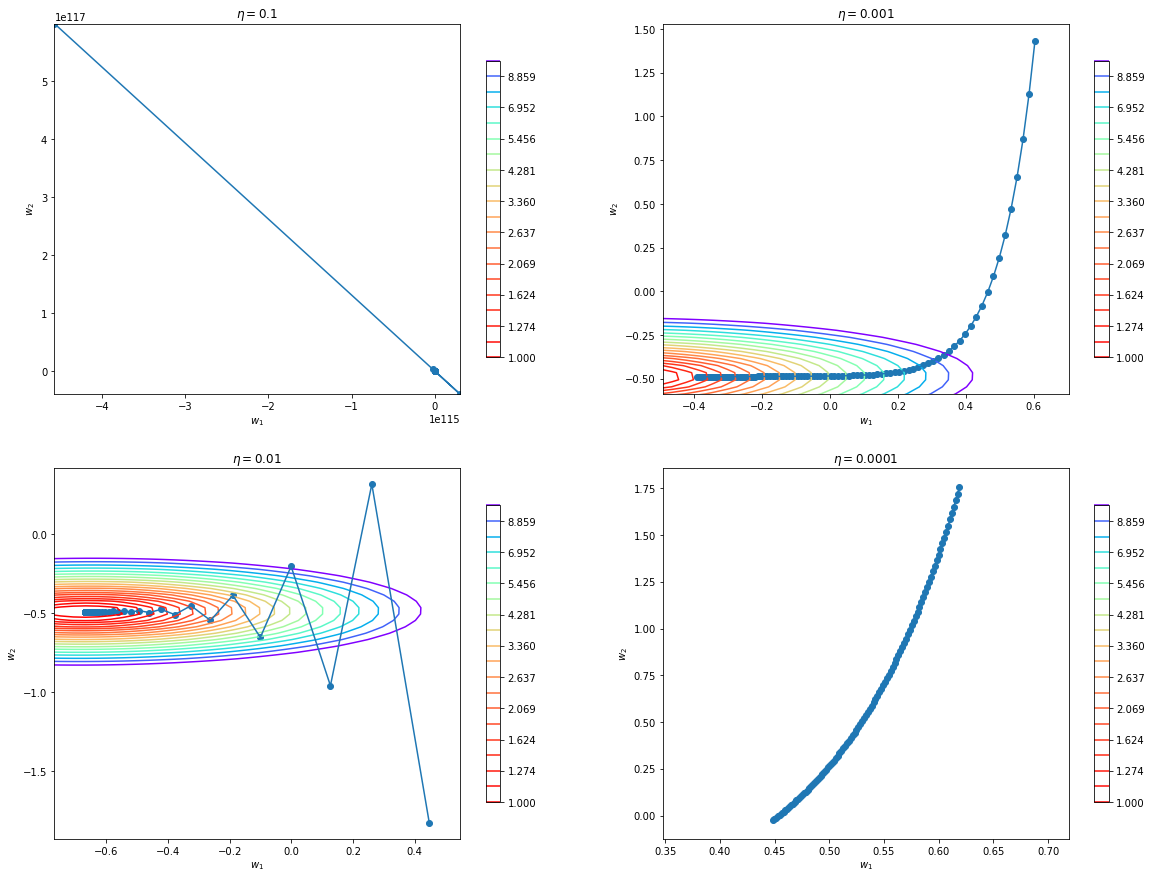

In [10]:
# -- YOUR CODE HERE --
plt.rcParams['figure.figsize'] = [20, 15]
lrs = [0.1, 0.01, 0.001, 0.0001]
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, lr in enumerate(lrs):
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    index = f'{i:02b}'
    plot_gd(w_list, X, y, loss, axs, row=int(index[-1]), col=int(index[-2]), label=f'$\eta={lr}$')

<font color=blue>
Шаг $\eta=0.1$ оказался слишком большим, что привело к тому, что компоненты вектора весов $w$ стали неограниченно возрастать по модулю и ушли на бесконечность - алгоритм не сошелся.

Шаг $\eta=0.01$ оказался оптимальным (из 4х вариантов) - траектория весов $w$ приблизилась к оптимуму довольно близко.

Шаг $\eta=0.001$ уже оказался довольно маленьким и видно, что траектория заметно не дотянула до оптимума.

Шаг $\eta=0.0001$ оказался слишком маленьким и видно, что траектория остановилась существенно далеко от оптимума.
    
Вывод: слишком большой шаг $\eta$ может привести к тому, что веса модели (точка $w$) уйдут на бесконечность, а слишком маленький шаг может привести к тому, что финальная точка $w$ окажется довольно далеко от оптимума (хотя при этом траектория движется в сторону оптимума).
</font>

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = [w_init] + [None] * n_iterations
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w[t+1] = w[t] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w[t])
    
    return w[1:]

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

<font color=blue>Рассмотрим 4 варианта шага $\eta\in\{0.1; 0.01; 0.001; 0.0001\}$ и 4 варианта размера батча $bs\in\{16; 32; 64; 128\}$. Всего 16 вариантов.</font>

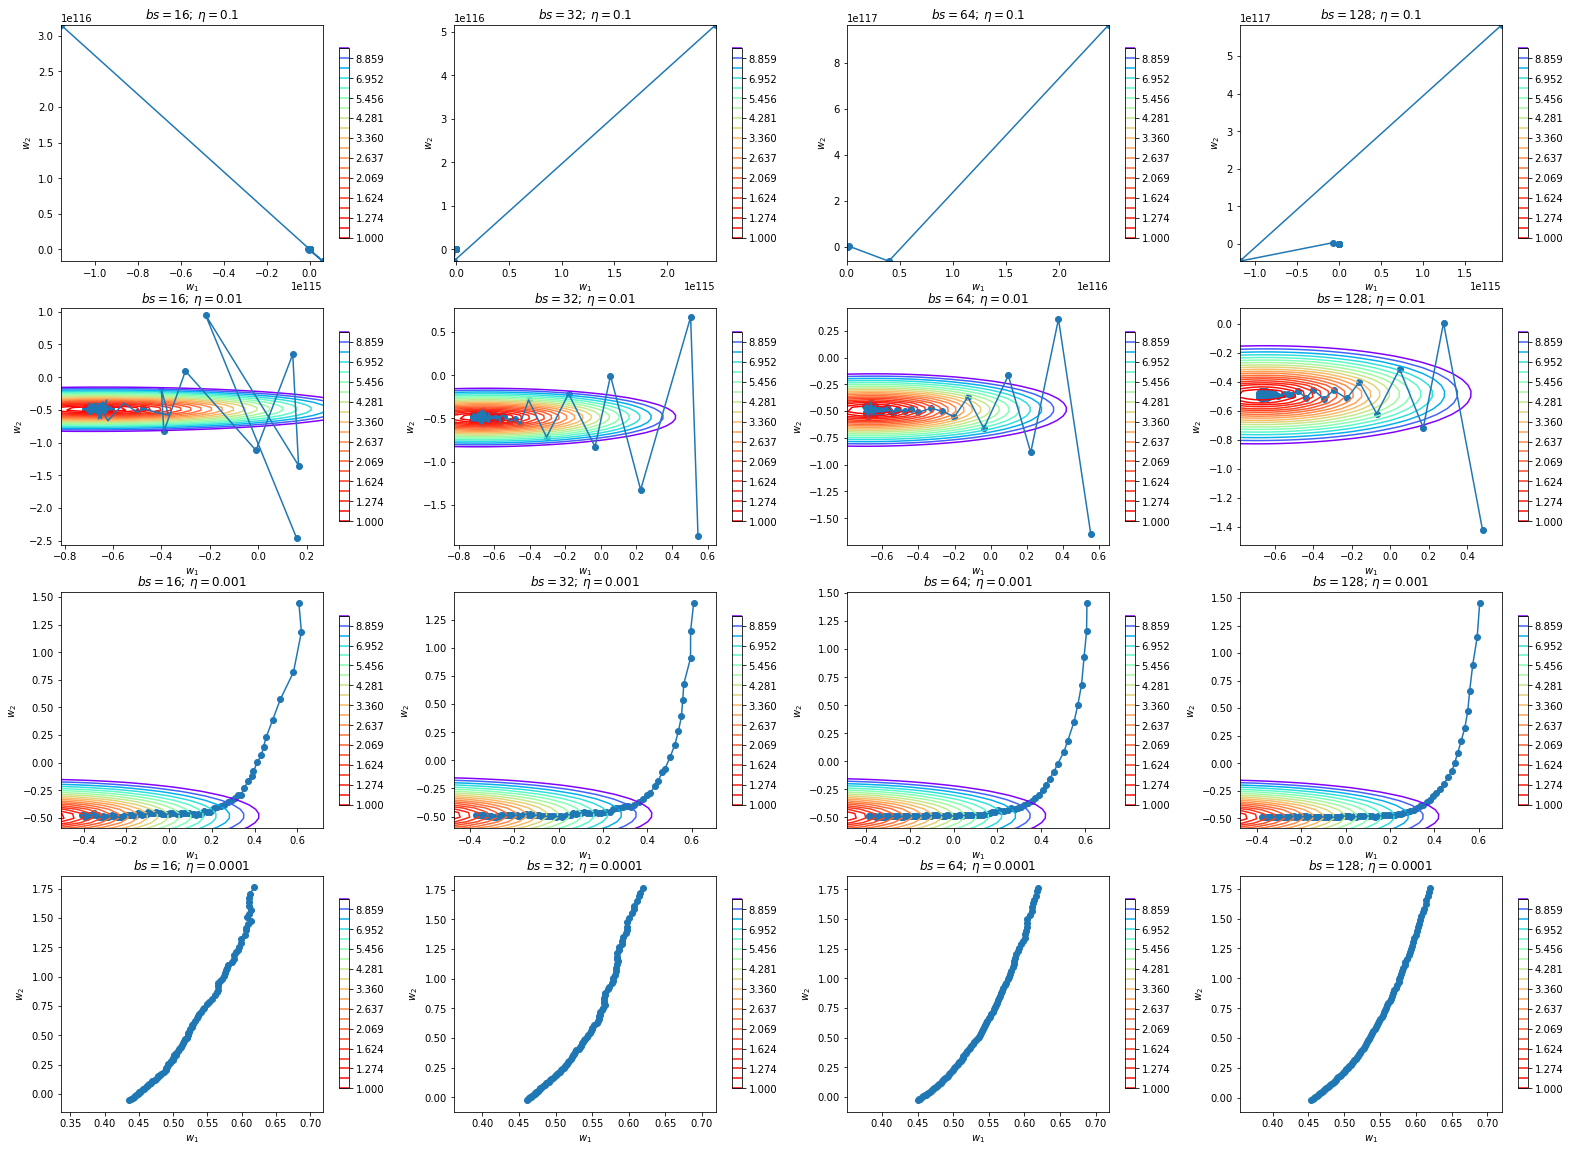

In [12]:
# -- YOUR CODE HERE --
plt.rcParams['figure.figsize'] = [27, 20]
lrs = [0.1, 0.01, 0.001, 0.0001]
bss = [16, 32, 64, 128]
fig, axs = plt.subplots(nrows=len(lrs), ncols=len(bss))
for i, lr in enumerate(lrs):
    for j, bs in enumerate(bss):
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size=bs, n_iterations=100)
        plot_gd(w_list, X, y, loss, axs, row=i, col=j, label=f'$bs={bs};\,\eta={lr}$')

<font color=blue>
Видно, что характер зависимости сходимости от гиперпараметра $\eta$ для стохастического градиентного спуска такой же как для обычного. Ожидаемо оптимальным шагом стало значение $\eta=0.01$.

Также видно, что чем больше размер батча, тем менее хаотично траектория приближается к оптимуму и при $\eta=0.01;\ bs=128$ уже трудно "на глаз" отличить стохастическую траекторию от обычной.

Кроме того, видно, что даже при $\eta=0.01;\ bs=16$ траектория вполне близко подходит к оптимуму. При этом понятно, что размер матриц, которые участвуют в вычислениях на каждой итерации на порядок меньше (если точнее, то в $\frac{300}{16}\approx 19$ раз), чем в обычном градиентном спуске, т.е. налицо заметная экономия ресурсов на одну итерацию.
</font>

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    s0 = 1
    w = [w_init] + [None] * n_iterations
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w[t+1] = w[t] - lr * ((s0 / (s0 + t)) ** p) * loss.calc_grad(X[batch_indices], y[batch_indices], w[t])
 
    return w[1:]

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

<font color=blue>Рассмотрим 4 варианта гиперпараметра $p\in\{0.1; 0.4; 0.7; 1.0\}$.</font>

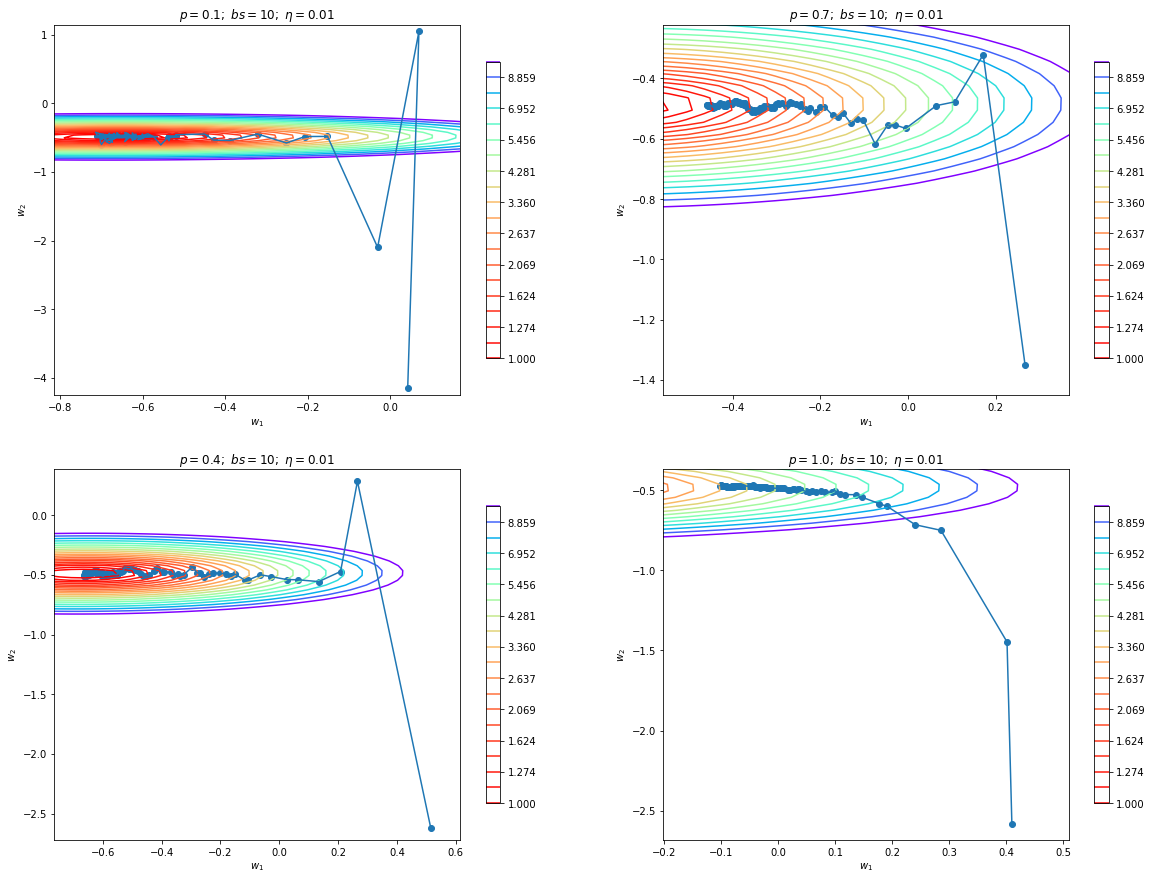

In [14]:
# -- YOUR CODE HERE --
ps = [0.1, 0.4, 0.7, 1.0]
lr = 0.01
bs = 10

plt.rcParams['figure.figsize'] = [20, 15]
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, p in enumerate(ps):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size=bs, p=p, n_iterations=100)
    index = f'{i:02b}'
    plot_gd(w_list, X, y, loss, axs, row=int(index[-1]), col=int(index[-2]), label=f'$p={p};\ bs={bs};\ \eta={lr}$')

<font color=blue>Для наглядности исключим из траекторий несколько первых точек.</font>

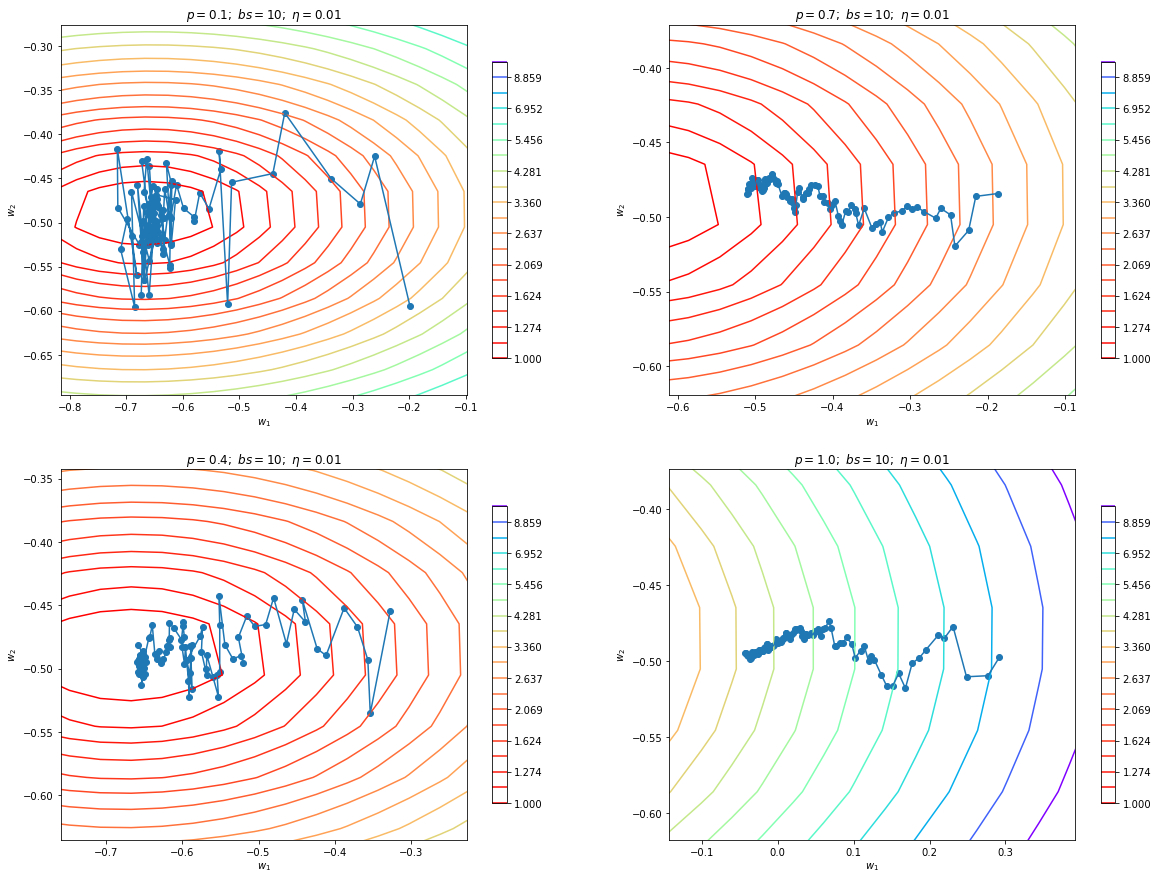

In [15]:
ps = [0.1, 0.4, 0.7, 1.0]
lr = 0.01
bs = 10

plt.rcParams['figure.figsize'] = [20, 15]
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, p in enumerate(ps):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size=bs, p=p, n_iterations=100)
    index = f'{i:02b}'
    plot_gd(w_list[5:], X, y, loss, axs, row=int(index[-1]), col=int(index[-2]), label=f'$p={p};\ bs={bs};\ \eta={lr}$')

<font color=blue>Хорошо видно, что два самых больших значений $p\in\{0.7; 1.0\}$ не позволили траектории приблизится к оптимуму достаточно близко. При $p\in\{0.1; 0.4\}$ траектории добрались до оптимума, но при $p=0.4$ амплитуда флуктуаций траектории в окрестности оптимума заметно ниже, чем при $p=0.1$, т.е. в данном случае $p=0.4$ оказалось оптимальным значением для сходимости алгоритма.</font>

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [16]:
# -- YOUR CODE HERE --

def plot_losses(losses, losses_sgd, start_t=0):
    iters = len(losses)
    ts = np.arange(start_t, iters)
    plt.rcParams['figure.figsize'] = [20, 10]
    fig, ax = plt.subplots()

    ax.set_title('Loss functions')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$loss$')
    ax.grid(True, zorder=5)
    
    ax.scatter(ts, losses[start_t:])
    ax.plot(ts, losses[start_t:], label='GD')
    
    ax.scatter(ts, losses_sgd[start_t:])
    ax.plot(ts, losses_sgd[start_t:], label='SGD')
    
    ax.legend()

In [17]:
bs = 10
lr = 0.01
p = 0.4
iters = 50

w_list = gradient_descent(w_init, X, y, loss, lr,  n_iterations=iters)
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size=bs, p=p, n_iterations=iters)

losses = [loss.calc_loss(X, y, w_list[t]) for t in range(iters)]
losses_sgd = [loss.calc_loss(X, y, w_list_sgd[t]) for t in range(iters)]

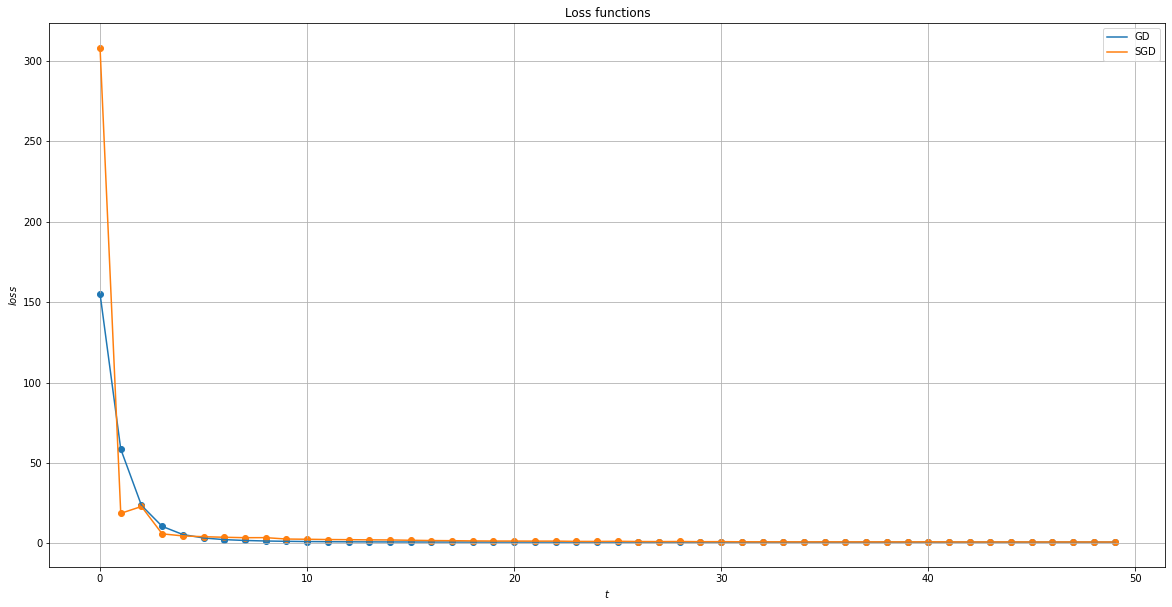

In [18]:
plot_losses(losses, losses_sgd)

<font color=blue> Для наглядности нарисуем графики начиная с t=10.</font>

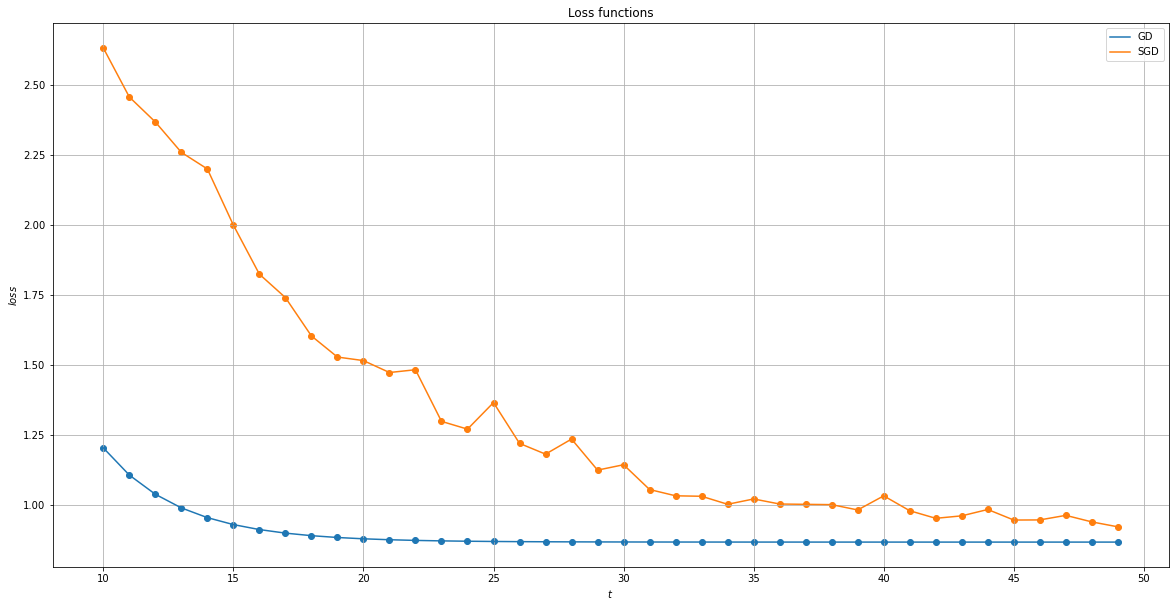

In [19]:
plot_losses(losses, losses_sgd, start_t=10)

<font color=blue>Как видно обычный градиентный спуск сходится быстрее, т.к. его траектория движется по более короткому пути к оптимуму в отличии от стохастического спуска, где путь флуктуирует. Однако при этом каждая итерация SGD требует на порядок меньше вычислений (т.е. в конечном счете времени и памяти), т.к. в SGD за одну итерацию обрабатывается батч размером $bs=10$ наблюдений, что в 30 раз меньше всего набора данных $X$.</font>

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [20]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_list[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [21]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [22]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [23]:
X_raw.shape

(201, 27)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [24]:
X_raw

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [25]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   201 non-null    int64  
 1   0       201 non-null    int64  
 2   1       164 non-null    float64
 3   2       201 non-null    object 
 4   3       201 non-null    object 
 5   4       201 non-null    object 
 6   5       199 non-null    object 
 7   6       201 non-null    object 
 8   7       201 non-null    object 
 9   8       201 non-null    object 
 10  9       201 non-null    float64
 11  10      201 non-null    float64
 12  11      201 non-null    float64
 13  12      201 non-null    float64
 14  13      201 non-null    int64  
 15  14      201 non-null    object 
 16  15      201 non-null    object 
 17  16      201 non-null    int64  
 18  17      201 non-null    object 
 19  18      197 non-null    float64
 20  19      197 non-null    float64
 21  20      201 non-null    float64
 22  21

<font color=blue>Как видно в датасете имеются пропуски. Заменим их средними значениями.</font>

In [26]:
X_raw.fillna(X_raw.mean(numeric_only=True), inplace=True)

In [27]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   201 non-null    int64  
 1   0       201 non-null    int64  
 2   1       201 non-null    float64
 3   2       201 non-null    object 
 4   3       201 non-null    object 
 5   4       201 non-null    object 
 6   5       199 non-null    object 
 7   6       201 non-null    object 
 8   7       201 non-null    object 
 9   8       201 non-null    object 
 10  9       201 non-null    float64
 11  10      201 non-null    float64
 12  11      201 non-null    float64
 13  12      201 non-null    float64
 14  13      201 non-null    int64  
 15  14      201 non-null    object 
 16  15      201 non-null    object 
 17  16      201 non-null    int64  
 18  17      201 non-null    object 
 19  18      201 non-null    float64
 20  19      201 non-null    float64
 21  20      201 non-null    float64
 22  21

<font color=blue>Остались пропуски только колонке в '5' (там не произошло замены, т.к. это тектовое поле).</font>

In [28]:
X_raw[X_raw[5].isna()]

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
26,27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
60,63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


<font color=blue>Видим, что пропущено два значения в колонке `5`. Заменим их на наиболее часто встречающееся (мода распределения).</font>

In [29]:
X_raw[5].value_counts()

four    113
two      86
Name: 5, dtype: int64

In [30]:
X_raw[5] = X_raw[5].fillna('four')

In [31]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   201 non-null    int64  
 1   0       201 non-null    int64  
 2   1       201 non-null    float64
 3   2       201 non-null    object 
 4   3       201 non-null    object 
 5   4       201 non-null    object 
 6   5       201 non-null    object 
 7   6       201 non-null    object 
 8   7       201 non-null    object 
 9   8       201 non-null    object 
 10  9       201 non-null    float64
 11  10      201 non-null    float64
 12  11      201 non-null    float64
 13  12      201 non-null    float64
 14  13      201 non-null    int64  
 15  14      201 non-null    object 
 16  15      201 non-null    object 
 17  16      201 non-null    int64  
 18  17      201 non-null    object 
 19  18      201 non-null    float64
 20  19      201 non-null    float64
 21  20      201 non-null    float64
 22  21

<font color=blue>Больше пропусков нет!</font>

In [32]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

<font color=blue>Удалим колонку `index` - она не содержит полезной информации</font> 

In [33]:
X_raw = X_raw.drop('index', axis=1)

In [34]:
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


<font color=blue>Выведем все уникальные значения по каждой колонке.</font>

In [35]:
for i in range(25):
    print(X_raw[i].unique())

[ 3  1  2  0 -1 -2]
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7 115.6
  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9
 114.2 108.   89.5  96.1  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9
 104.5  97.3 104.3 109.1]
[168.8 171.2 176.6 177.3 192.7 176.8 189.  1

<font color=blue>Оценив взглядом уникальные значения всех признаков можно заключить, что все текстовые поля разумно преобразовать в onehot вид, а все числовые (в т.ч. натуральные) нормализовать с помощью `StandardSaler`. Сделаем это!</font>

In [36]:
X_raw.dtypes

0       int64
1     float64
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18    float64
19    float64
20    float64
21    float64
22    float64
23      int64
24      int64
dtype: object

In [37]:
categorical_features = X_raw.dtypes[X_raw.dtypes == 'object'].index
float_features = X_raw.dtypes[X_raw.dtypes == 'float64'].index
int_features =  X_raw.dtypes[X_raw.dtypes == 'int64'].index

In [38]:
X_raw=pd.get_dummies(X_raw, columns=categorical_features, drop_first=True)

In [39]:
X_raw.dtypes

0            int64
1          float64
9          float64
10         float64
11         float64
            ...   
17_idi       uint8
17_mfi       uint8
17_mpfi      uint8
17_spdi      uint8
17_spfi      uint8
Length: 64, dtype: object

In [40]:
onehot_features =  X_raw.dtypes[X_raw.dtypes == 'uint8'].index.to_list()
numeric_features = list(float_features) + list(int_features)

<font color=blue>Теперь зафиксируем `random seed` и разделим наш датасет на `train` и `test` в соотношении `4:1`</font>

In [41]:
# -- YOUR CODE HERE --
from sklearn.model_selection import train_test_split
seed = 7456
Xtrain, Xtest, ytrain, ytest =  train_test_split(X_raw, y, test_size=0.2, random_state=seed)

<font color=blue>Нормализуем числовые признаки, не трогая onehot признаки.</font>

In [42]:
from sklearn.preprocessing import StandardScaler

def train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, scaler):

    Xtrain_scaled = scaler.fit_transform(Xtrain[numeric_features])
    Xtest_scaled = scaler.transform(Xtest[numeric_features])

    Xtrain_scaled = pd.DataFrame(Xtrain_scaled)
    Xtest_scaled = pd.DataFrame(Xtest_scaled)

    Xtrain_scaled.columns = numeric_features
    Xtest_scaled.columns = numeric_features

    Xtrain_scaled = pd.concat([Xtrain_scaled, Xtrain[onehot_features].reset_index()], axis=1)
    Xtest_scaled = pd.concat([Xtest_scaled, Xtest[onehot_features].reset_index()], axis=1)

    Xtrain_scaled = Xtrain_scaled.drop(columns=['index'])
    Xtest_scaled = Xtest_scaled.drop(columns=['index'])
    
    return Xtrain_scaled, Xtest_scaled

Xtrain_scaled, Xtest_scaled = train_test_scale(Xtrain, Xtest, numeric_features, onehot_features, StandardScaler())

<font color=blue>Получили нормализованные таблицы `Xtrain_scaled` и `Xtest_scaled` без текстовых значений. Взглянем на `Xtrain_scaled`.</font>

In [43]:
pd.set_option('display.max_columns', None)
Xtrain_scaled

,1,9,10,11,12,18,19,20,21,22,0,13,16,23,24,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,2_mitsubishi,2_nissan,2_peugot,2_plymouth,2_porsche,2_renault,2_saab,2_subaru,2_toyota,2_volkswagen,2_volvo,3_gas,4_turbo,5_two,6_hardtop,6_hatchback,6_sedan,6_wagon,7_fwd,7_rwd,8_rear,14_l,14_ohc,14_ohcf,14_ohcv,14_rotor,15_five,15_four,15_six,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.443029,-1.960365,-2.355310,-0.931287,-1.164976,-1.566569,0.538488,-0.216660,-0.716612,1.863972,0.890660,-1.407051,-0.800390,0.923985,1.061027,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.026821,2.481158,1.979414,1.179278,1.164976,0.438848,-3.171501,-0.429479,-0.213656,-0.274187,-0.675336,1.383142,-0.149855,-0.947377,-0.968606,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2.165813,0.389136,0.215190,-0.509174,0.217199,0.584696,-1.316506,-0.323070,-0.054828,1.436340,-0.675336,-0.310768,-0.428656,-0.323590,-0.243737,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,-0.778581,-0.689060,-1.453240,-1.071991,-0.691087,-1.129023,-0.373804,-0.110250,-0.875441,0.581077,0.107662,-1.302372,-0.846857,2.015614,1.785895,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.527994,-0.254563,-0.056230,-0.321568,0.375162,-0.035160,0.720946,-0.402877,-0.160714,0.153445,-0.675336,-0.487772,-0.149855,0.300198,0.481132,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.026821,1.805274,1.827739,2.351814,1.007013,1.022242,0.477668,-0.535889,2.089352,0.581077,-0.675336,1.801861,1.917916,-1.571165,-1.548501,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
156,-0.997844,-0.495950,-0.623017,-0.696780,-0.375162,-0.545629,-0.617082,-0.269865,-0.875441,-0.701818,-0.675336,-0.855103,-0.660990,0.768038,0.916053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
157,-0.246084,0.002917,0.295019,0.288151,0.691087,0.183613,0.477668,-0.376274,-0.504841,-0.701818,-0.675336,-0.282219,-0.103389,0.144251,0.191184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
158,-0.026821,0.517876,1.404644,2.211110,-2.349696,0.730545,-1.438145,0.395195,4.207061,-0.274187,-0.675336,2.648816,4.636221,-1.883059,-1.983422,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


<font color=blue>Кажется что надо! Продолжим!</font>

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [44]:
# -- YOUR CODE HERE --
model = linear_regression.fit(Xtrain_scaled, ytrain)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

<font color=blue>В качестве ошибки будем считать корень из `MSE`, т.е. считать `RMSE` (числа меньшего порядка проще воспринимать и размерность `RMSE` совпадает с целевой переменной, что тоже весьма удобно). Также посчитаем $R^2$, чтобы оценить обобщающую способность нашей модели на тесте.</font>

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# -- YOUR CODE HERE --
def calc_metrics(x_train, x_test, y_train, y_test, model, verbose=True):
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    train_rmse = mean_squared_error(y_train, pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, pred_test, squared=False)
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    if verbose:
        print(f'Train R2: {train_r2:0.4f}')
        print(f'Test R2: {test_r2:0.4f}')    
        print(f'Train RMSE: {train_rmse:0.2f}')    
        print(f'Test RMSE: {test_rmse:0.2f}')
        
    return train_r2, test_r2, train_rmse, test_rmse

In [46]:
_ = calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model)

Train R2: 0.9671
Test R2: 0.9528
Train RMSE: 1451.94
Test RMSE: 1649.79


<font color=blue>Весьма хорошее качество! На тестовой выборке $R^2 > 0.95$</font>

In [47]:
model.lr

0.1

<font color=blue>Как видно параметр `lr` при обучении был равен 0.1. Попробуем обучить модель при разных параметрах `lr` и запишим результаты в список `expiriments` для сравнений в дальнейшем.</font> 

In [48]:
lrs = [0.1/(3**r) for r in range(10)]

In [49]:
lrs

[0.1,
 0.03333333333333333,
 0.011111111111111112,
 0.003703703703703704,
 0.0012345679012345679,
 0.000411522633744856,
 0.00013717421124828533,
 4.5724737082761774e-05,
 1.5241579027587259e-05,
 5.080526342529086e-06]

<font color=blue>Имеем 10 вариантов с `lr` в диапазоне от 0.1 до 5e-06<font>

In [50]:
from tqdm.notebook import tqdm

In [51]:
experiments = list()
for lr in tqdm(lrs):
    linear_regression = LinearRegression(lr = lr, loss=MSELoss())
    model = linear_regression.fit(Xtrain_scaled, ytrain)
    experiments.append(('MSELoss', lr, *calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model, verbose=False)))

  0%|          | 0/10 [00:00<?, ?it/s]

<font color=blue>Сопоставим результаты экспериментов по `RMSE` на тесте, отсортировав их по `Test RMSE`.</font>

In [52]:
pd.DataFrame(experiments, columns=['loss', 'lr', 'train R2', 'test R2', 'train RMSE', 'test RMSE'])\
.sort_values(by='test RMSE', ascending=True)\
.reset_index(drop=True)

,loss,lr,train R2,test R2,train RMSE,test RMSE
0,MSELoss,0.003704,0.965466,0.959171,1488.573087,1534.129034
1,MSELoss,0.011111,0.966654,0.956667,1462.748343,1580.478137
2,MSELoss,0.033333,0.967066,0.953829,1453.672424,1631.421483
3,MSELoss,0.100000,0.967145,0.952783,1451.937622,1649.790507
4,MSELoss,0.001235,0.960795,0.951131,1586.036825,1678.407479
5,MSELoss,0.000412,0.948230,0.923489,1822.561002,2100.113638
6,MSELoss,0.000137,0.928079,0.897286,2148.183144,2433.300726
7,MSELoss,0.000046,0.899407,0.869333,2540.552173,2744.496944
8,MSELoss,0.000015,0.855745,0.814273,3042.356948,3272.033079
9,MSELoss,0.000005,0.781931,0.715049,3740.603595,4052.892124


<font color=blue>Как видно оптимальное значение `lr` $\approx 0.004$. Далее по тексту утверждается, что модель переобучилась, но судя по результатам экспериментов не похоже, что мы имеем дело с переобучением. Как метрика `RMSE` дает близкие по значению величины на трейне и тесте так и метрика $R^2$. Возможно нам повезло с `random seed`.</font>

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [53]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.mean((X @ w - y) ** 2) + self.coef * (np.sum(w * w) - w[-1] ** 2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        reg = 2 *  self.coef * w
        reg[-1] = 0
        return 2 * (X.T @ ( X @ w - y)) / y.shape[0] + reg

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

<font color=blue>Попробует теперь модель с регуляризацией `MSEL2Loss(0.1)`</font>

In [54]:
linear_regression = LinearRegression(MSEL2Loss(0.1))
model = linear_regression.fit(Xtrain_scaled, ytrain)
_ = calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model)

Train R2: 0.9050
Test R2: 0.8675
Train RMSE: 2468.60
Test RMSE: 2763.35


<font color=blue>Видно, что при $\lambda=0.1$ качество модели заметно упало.</font>

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

<font color=blue>Попробуем разные значения $\lambda$ в диапазоне от 1.0 до 0.0001. И разные значения `learning rate` (оно же $\eta)$ из ранее созданного списка `lrs`. Запишем все результаты в список `experiments`.</font>

In [55]:
# -- YOUR CODE HERE --
lambs = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
for lamb in tqdm(lambs):
    for lr in lrs:
        linear_regression = LinearRegression(loss=MSEL2Loss(lamb), lr=lr)
        model = linear_regression.fit(Xtrain_scaled, ytrain)
        experiments.append((f'MSEL2Loss({lamb})', lr, *calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model, verbose=False)))      

  0%|          | 0/9 [00:00<?, ?it/s]

<font color=blue>Посмотрим топ10 наших моделей по `RMSE` на тесте. </font>

In [56]:
pd.DataFrame(experiments, columns=['loss', 'lr', 'train R2', 'test R2', 'train RMSE', 'test RMSE'])\
.sort_values(by='test RMSE', ascending=True)\
.reset_index(drop=True).head(10)

,loss,lr,train R2,test R2,train RMSE,test RMSE
0,MSEL2Loss(0.0001),0.003704,0.965385,0.959213,1490.319894,1533.351006
1,MSELoss,0.003704,0.965466,0.959171,1488.573087,1534.129034
2,MSEL2Loss(0.0005),0.011111,0.966113,0.959125,1474.556616,1535.005000
3,MSEL2Loss(0.0005),0.003704,0.964938,0.958860,1499.893654,1539.979009
4,MSEL2Loss(0.0005),0.033333,0.966388,0.958637,1468.565388,1544.138447
5,MSEL2Loss(0.0005),0.100000,0.966430,0.958536,1467.643125,1546.016167
6,MSEL2Loss(0.001),0.011111,0.965231,0.958400,1493.618348,1548.558238
7,MSEL2Loss(0.001),0.033333,0.965436,0.958194,1489.218872,1552.382679
8,MSEL2Loss(0.001),0.100000,0.965450,0.958172,1488.907171,1552.797769
9,MSEL2Loss(0.0001),0.011111,0.966598,0.957607,1463.963733,1563.237013


<font color=blue>Как видно наилучшая модель с `L2` регуляризацией оказалась при $\lambda=0.0001$ и $\eta\approx0.004$. И даже по метрикам `RMSE` и $R^2$ на тесте удалось немного обогнать лучшую `MSELoss` модель без регуляризации. Улучшение совсем незначительное, т.к. модель без регуляризации и так оказалась весьма хороша.</font>

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [57]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        def phi(z):
            return 0.5 * z * z if -self.eps < z < self.eps else self.eps * (abs(z) - 0.5 * self.eps)
        
        return np.mean(np.vectorize(phi)(X @ w - y))
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        def grad_phi(z):
            return z if -self.eps < z < self.eps else self.eps * np.sign(z)
        
        return (X.T @ ( np.vectorize(grad_phi)(X @ w - y))) / y.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

<font color=blue>Попробуем разные значения $\varepsilon$ в диапазоне от 600 до 1600. И разные значения $\eta$ из ранее созданного списка `lrs`. Как и ранее запишем все результаты в список `experiments`.</font>

In [58]:
epss = [600, 800, 1200, 1400, 1600]
for eps in tqdm(epss):
    for lr in lrs:
        linear_regression = LinearRegression(loss=HuberLoss(eps), lr=lr)
        model = linear_regression.fit(Xtrain_scaled, ytrain)
        experiments.append((f'HuberLoss({eps})', lr, *calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model, verbose=False)))

  0%|          | 0/5 [00:00<?, ?it/s]

<font color=blue>На моем ноутбуке эти 50 экспериментов заняли больше 13 минут. `HuberLoss` и ее градиент заметно дольше вычисляются, чем для двух предыдущих функций потерь!</font>

<font color=blue>Посмотрим теперь на обновленный топ25 наших моделей по `RMSE` на тесте. </font>

In [59]:
pd.DataFrame(experiments, columns=['loss', 'lr', 'train R2', 'test R2', 'train RMSE', 'test RMSE'])\
.sort_values(by='test RMSE', ascending=True)\
.reset_index(drop=True).head(25)

,loss,lr,train R2,test R2,train RMSE,test RMSE
0,HuberLoss(1200),0.033333,0.959978,0.962286,1602.477022,1474.446151
1,HuberLoss(1600),0.011111,0.960223,0.961796,1597.580526,1484.002044
2,HuberLoss(1400),0.033333,0.960900,0.961781,1583.917259,1484.298410
3,HuberLoss(1600),0.033333,0.961762,0.961741,1566.365939,1485.068670
4,HuberLoss(800),0.033333,0.958060,0.961127,1640.439535,1496.930591
5,HuberLoss(800),0.100000,0.958846,0.960916,1624.984885,1500.998638
6,HuberLoss(1400),0.011111,0.959447,0.960483,1613.078310,1509.281056
7,HuberLoss(600),0.100000,0.957607,0.959831,1649.261201,1521.686519
8,HuberLoss(1200),0.100000,0.960850,0.959743,1584.932795,1523.358666
9,HuberLoss(1400),0.100000,0.961672,0.959216,1568.208231,1533.301843


<font color=blue>Похоже оно того стоило! При довольно большом числе комбинаций гиперпараметров линейная регрессия оптимизированная по `HuberLoss` выглядит лучше двух предыдущих `Loss` функций.</font>

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

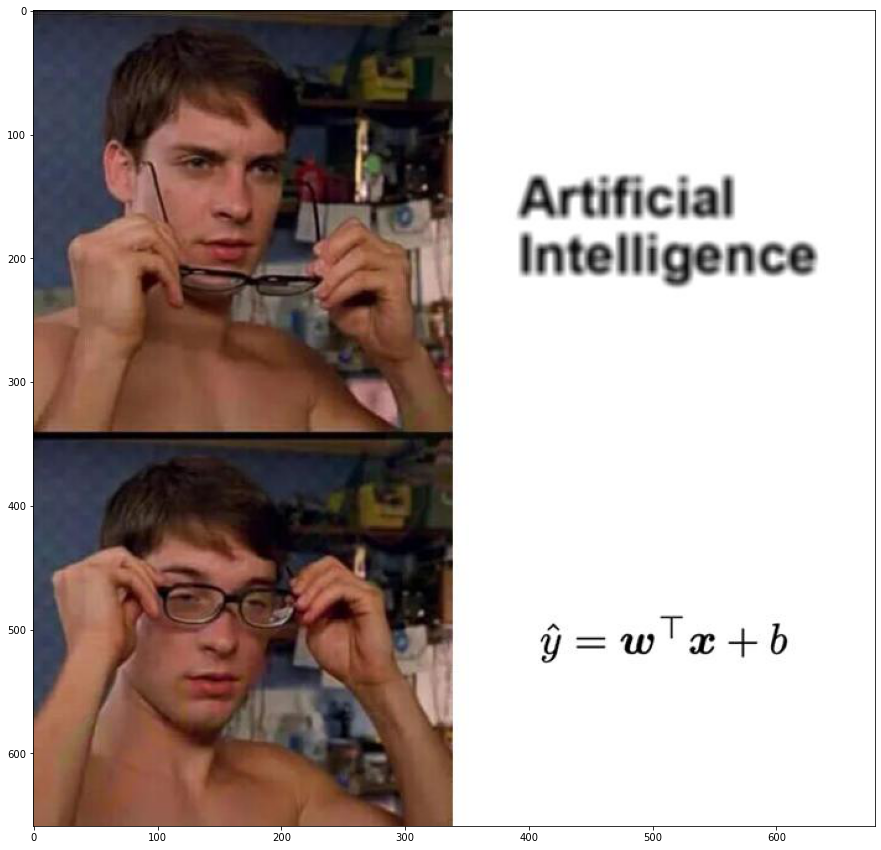

In [16]:
plt.rcParams['figure.figsize'] = [20, 15]
ax = plt.imshow(plt.imread('ai.jpg'))

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [60]:
# -- YOUR CODE HERE --
from math import exp

class LinearRegressionSA:
    def __init__(self, loss: BaseLoss, lr: float = 0.9999, t0: float = 100000, min_t: float = 100) -> None:
        self.loss = loss
        self.lr = lr
        self.t0 = t0
        self.min_t = min_t
    
    def simulated_annealing(self, w_init: np.ndarray, X: np.ndarray, y: np.ndarray, verbose=False):
        current_t = self.t0
        w_shape = w_init.shape
        current_loss = self.loss.calc_loss(X, y, w_init)
        w = w_init
        k = 0
        self.history = list()
        
        while current_t > self.min_t:
                      
            new_w = w + np.random.standard_t(1, size=w_shape)
            new_loss = self.loss.calc_loss(X, y, new_w)
            delta_loss = new_loss - current_loss
            
            if verbose and k % 1000 == 0:
                print(f'iter: {k}')
                print(f'current loss: {current_loss}')
                print(f'delta loss: {delta_loss}')
                print(f'current T: {current_t}')
                print()
                    
            self.history.append(current_loss)
            
            if delta_loss < 0:
                w = new_w
                current_loss = new_loss
            else:
                if np.random.uniform() < exp(-delta_loss / current_t):
                    w = new_w
                    current_loss = new_loss
                    
                current_t *= self.lr
            k += 1
        
        if verbose:
            print(f'final iter: {k}')
            print(f'final loss: {current_loss}')
            print(f'final delta loss: {delta_loss}')
            print(f'final T: {current_t}')
            print()
        
        return w
            
        
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegressionSA':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        self.w = self.simulated_annealing(w_init, X, y)
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        return X @ self.w

<font color=blue>
    
Новый класс `LinearRegressionSA` устроен аналогично `LinearRegression`. В него добавлен метод `simulated_annealing`, в котором реализован метод имитации отжига. Класс по умолчанию инициализируется гипераметрами для сходимости метода имитации отжига, значения которых были подобраны путем проб и ошибок (сами эксперименты тут не приводятся, т.к. кажется этот юпитер ноутбук и так перенасыщен экспериментами - в списке `experiments` уже 150 записей!). Кроме того в список класса `history` сохраняются значения `MSELoss` на каждой итерации алгоритма (это нужно чтобы потом сравнить траектории функции потерь с градиентным спуском)
    
По умолчанию гиперпараметры следующие:
* стартовая температура $T_0=100000$
* минимальная температура $T_{min}=100$
* множитель понижающий температуру $\alpha=0.9999$
* распределение для получение новой точки - рапределение Коши $C(0,1)$ (оно же распределение Стьюдента $t(1)$)
* функция, минимум которой мы ищем - `MSELoss`
    
Обучим модель и посмотрим на метрики.
</font>

In [61]:
linear_regression = LinearRegressionSA(MSELoss())
model_sa = linear_regression.fit(Xtrain_scaled, ytrain)
_ = calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model_sa)

Train R2: 0.9659
Test R2: 0.9569
Train RMSE: 1479.70
Test RMSE: 1575.66


<font color=blue>Вполне достойный результат! Добавим его в нашу таблицу и посмотрим обновленный топ.</font>

In [62]:
experiments.append(('Simulated Annealing', 'lr=0.9999 t0=100000 min_t=100', *calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model_sa, verbose=False)))

In [63]:
pd.DataFrame(experiments, columns=['loss', 'lr', 'train R2', 'test R2', 'train RMSE', 'test RMSE'])\
.sort_values(by='test RMSE', ascending=True)\
.reset_index(drop=True).head(25)

,loss,lr,train R2,test R2,train RMSE,test RMSE
0,HuberLoss(1200),0.033333,0.959978,0.962286,1602.477022,1474.446151
1,HuberLoss(1600),0.011111,0.960223,0.961796,1597.580526,1484.002044
2,HuberLoss(1400),0.033333,0.960900,0.961781,1583.917259,1484.298410
3,HuberLoss(1600),0.033333,0.961762,0.961741,1566.365939,1485.068670
4,HuberLoss(800),0.033333,0.958060,0.961127,1640.439535,1496.930591
5,HuberLoss(800),0.1,0.958846,0.960916,1624.984885,1500.998638
6,HuberLoss(1400),0.011111,0.959447,0.960483,1613.078310,1509.281056
7,HuberLoss(600),0.1,0.957607,0.959831,1649.261201,1521.686519
8,HuberLoss(1200),0.1,0.960850,0.959743,1584.932795,1523.358666
9,HuberLoss(1400),0.1,0.961672,0.959216,1568.208231,1533.301843


<font color=blue>Почетное 25 место! От топовых моделей  отличия по метрикам совсем не значительные. Перебор гиперпараметров возможно помог бы подняться этому методу выше.</font>

<font color=blue>Посмотрим на размер списка `history` (это число итераций, которое потребовалось для обучения).</font>

In [64]:
len(model_sa.history)

96256

<font color=blue>Примерно такое же кол-во итераций (100000) стоит по умолчанию в алгоритме `gradient_descent`, который обучал все наши модели в разделе `Линейная регрессия`.</font>

<font color=blue>Чтобы сравнить траектории с градиентным спуском нужно немного изменить наш старый класс `LinearRegression`. Также добавим туда переменную `history` со значениями функции потерь на каждой итерации, а число итераций зададим ровно `len(model_sa.history)` чтобы получить сравнимые по длине траектории. Гиперпараметр $\eta$ установим в $0.003704$ - именно это значение давало лучшее качество модели для `MSELoss`.</font> 

In [65]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.003704, niters=100000) -> None:
        self.loss = loss
        self.lr = lr
        self.niters = niters
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=self.niters)
        self.w = w_list[-1]
        self.history = [self.loss.calc_loss(X, y, w) for w in w_list] 
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        return X @ self.w

<font color=blue>Обучим модель линейной регрессии с помощью `gradient_descent`</font>

In [66]:
linear_regression = LinearRegression(MSELoss(), niters=len(model_sa.history))
model_gd = linear_regression.fit(Xtrain_scaled, ytrain)
_ = calc_metrics(Xtrain_scaled, Xtest_scaled, ytrain, ytest, model_gd)

Train R2: 0.9654
Test R2: 0.9591
Train RMSE: 1490.18
Test RMSE: 1534.56


<font color=blue>Посмотрим на графиках, что получилось.</font>

<AxesSubplot:xlabel='iteration number', ylabel='MSELoss'>

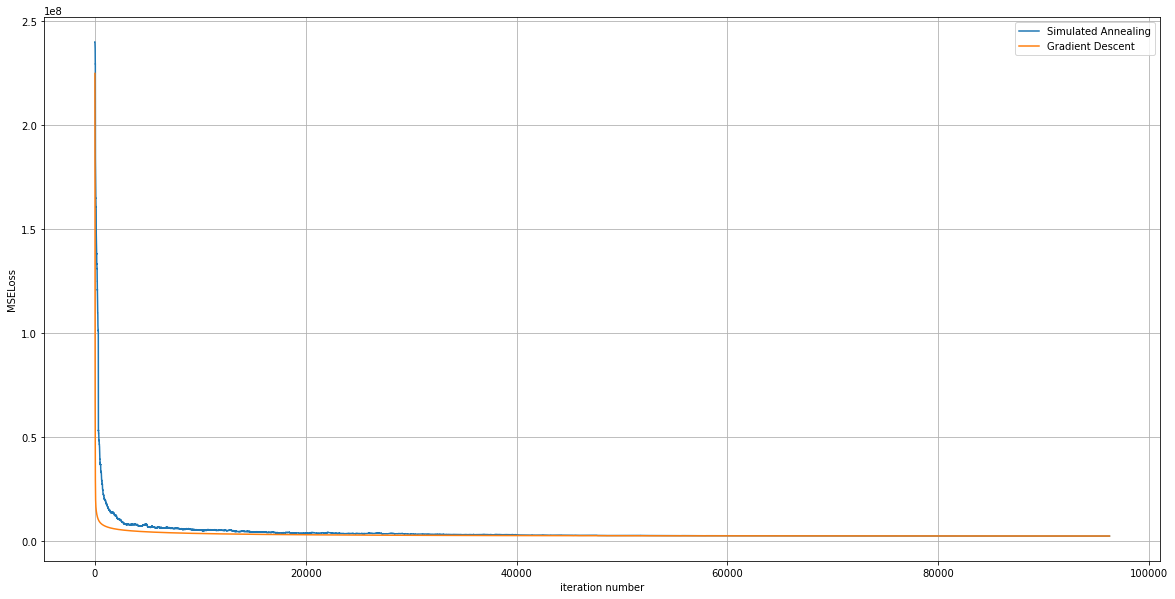

In [67]:
pd.DataFrame({'Simulated Annealing': model_sa.history, 'Gradient Descent': model_gd.history})\
.plot(grid=True, xlabel='iteration number', ylabel='MSELoss')

<font color=blue>В принципе видно, что градиентный спуск поначалу сходился быстрее. Но для наглядности посмотрим, что происходило после 3000 итераций.</font>

<AxesSubplot:xlabel='iteration number', ylabel='MSELoss'>

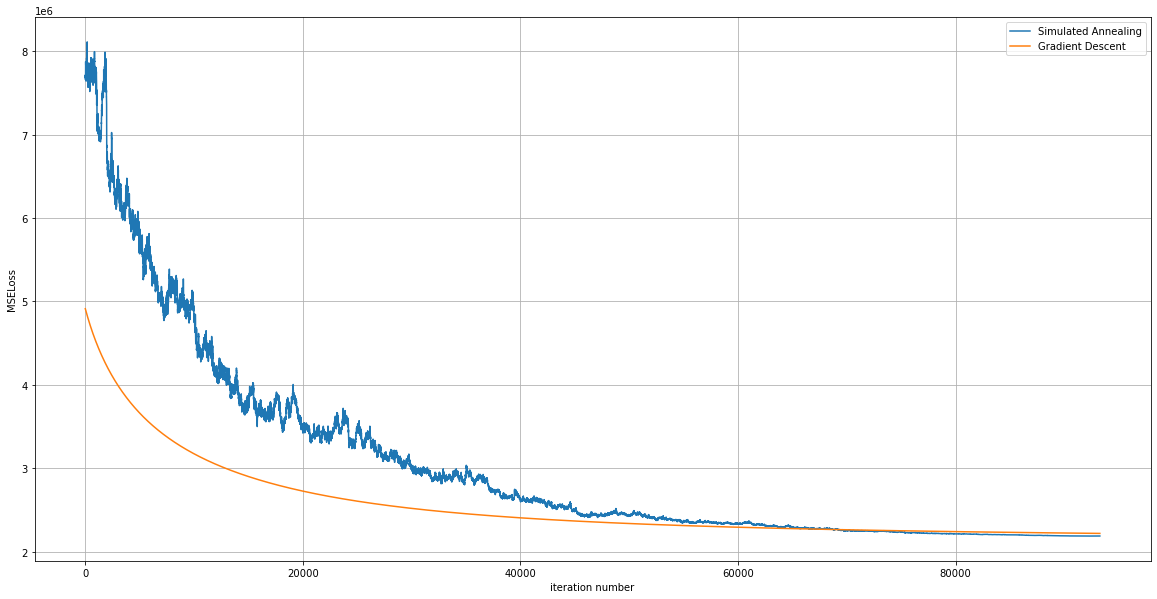

In [68]:
start_iter = 3000
pd.DataFrame({'Simulated Annealing': model_sa.history[start_iter:], 'Gradient Descent': model_gd.history[start_iter:]})\
.plot(grid=True, xlabel='iteration number', ylabel='MSELoss')

<font color=blue>Видно, что где-то до 70000й итерации градиентный спуск опережал алгоритм имитации отжига. Также видны заметные флуктуации последнего - сказывается стохастическая сущность этого алгоритма. Посмотрим на траектории после 65000й итерации.</font> 

<AxesSubplot:xlabel='iteration number', ylabel='MSELoss'>

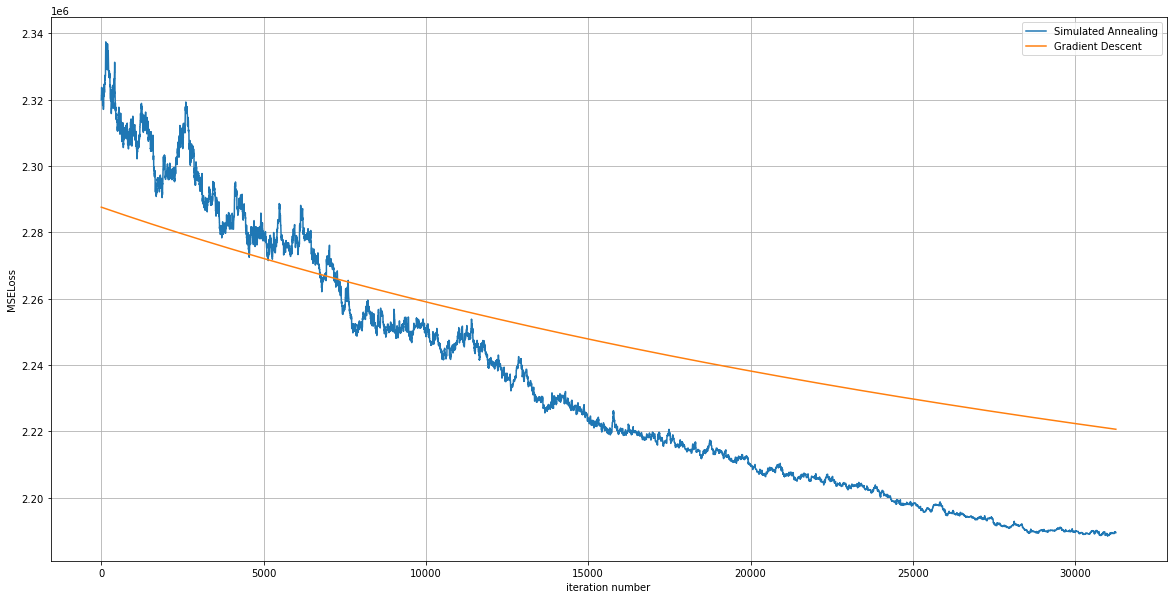

In [69]:
start_iter = 65000
pd.DataFrame({'Simulated Annealing': model_sa.history[start_iter:], 'Gradient Descent': model_gd.history[start_iter:]})\
.plot(grid=True, xlabel='iteration number', ylabel='MSELoss')

<font color=blue>Любопытно, но стохастический алгоритм имитации отжига обогнал градиентный спуск и сошелся к более глубокому минимуму функции `MSELoss`, что кстати можно было обнаружить в таблице `experiments` в колонке `Train RMSE`. Возможно стохастический алгоритм не смог бы обогнать градиентный спуск, если бы параметр $\eta$ уменьшился где-нибудь в райрне 75000й итерации, но этот эксперимент мы здесь проводить не будем! :)  Заметим только, что качество линейной регрессии даже с таким градиентным спуском на тесте все таки оказалось чуть лучше.</font>

<font color=blue>Алгоритм имитации отжига прекрасно себя ведет в нашей задаче линейной регрессии!
</font> 